In [116]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd



rbob_prices = pd.read_csv('./data/RBOB_prices.csv')

rbob_prices.head(5)


,Date,Price,Open,High,Low,Vol.,Change %
0,03/14/2024,2.6957,2.6619,2.7054,2.6547,NaN,1.28%
1,03/13/2024,2.6615,2.6048,2.6657,2.5925,15.00K,2.90%
2,03/12/2024,2.5864,2.5818,2.5980,2.5521,14.98K,0.23%
3,03/11/2024,2.5805,2.5088,2.5886,2.5088,12.16K,2.35%
4,03/10/2024,2.5212,2.5256,2.5258,2.5187,NaN,-0.24%


In [117]:
import pandas as pd

# Assuming rbob_prices is your DataFrame containing the price data
rbob_prices = pd.read_csv('./data/RBOB_prices.csv')
rbob_prices['Date'] = pd.to_datetime(rbob_prices['Date'], format='%m/%d/%Y')


rbob_prices = rbob_prices[rbob_prices['Date'] >= pd.Timestamp('2019-01-01')]
for year in range(2019, rbob_prices['Date'].dt.year.max() + 1):
    feb_14 = rbob_prices[(rbob_prices['Date'].dt.month == 2) & (rbob_prices['Date'].dt.day == 14) & (rbob_prices['Date'].dt.year == year)]
    for index, row in feb_14.iterrows():
        target_date = row['Date'] + pd.Timedelta(days=15)
        data_5_days_before = rbob_prices[rbob_prices['Date'] == target_date]
        if not data_5_days_before.empty:
            price_diff = ((row['Price'] - data_5_days_before['Price'].values[0])/data_5_days_before['Price'].values[0]) *100
            print(f"Price difference of RBOB between 5 days before and February 14th, {year}: {price_diff}")
        else:
            print(f"No data exists for 5 days before February 14th, {year}.")


Price difference of RBOB between 5 days before and February 14th, 2019: -0.27350872623078804
No data exists for 5 days before February 14th, 2020.
Price difference of RBOB between 5 days before and February 14th, 2021: 10.925132995977673
Price difference of RBOB between 5 days before and February 14th, 2022: -2.8732534516356454
Price difference of RBOB between 5 days before and February 14th, 2023: -6.96500672947509
Price difference of RBOB between 5 days before and February 14th, 2024: -10.2324680356451


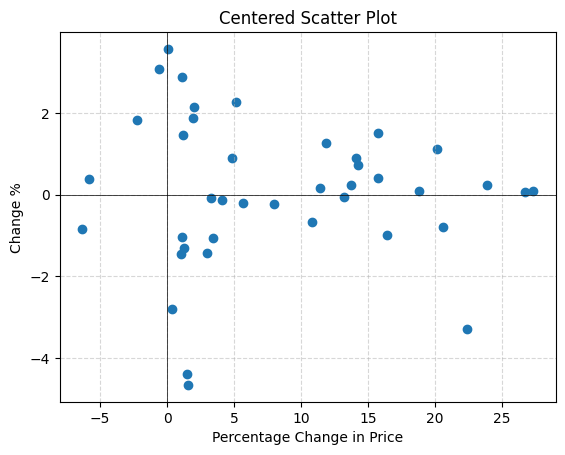

In [127]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

Specific_dates=['2024-01-31', 
                '2023-02-01', '2023-03-22', '2023-05-03', '2023-06-14', '2023-07-26', '2023-09-20', '2023-11-01', '2023-12-13',
                '2022-01-26', '2022-03-16', '2022-05-03', '2022-06-15', '2022-07-27', '2022-09-21', '2022-11-02', '2022-12-14',
                '2021-01-27', '2021-03-17', '2021-04-28', '2021-06-16', '2021-07-28', '2021-09-22', '2021-11-03', '2021-12-15',
                '2020-01-29', '2020-04-29', '2020-06-10', '2020-07-29', '2020-09-15', '2020-11-05', '2020-12-16',
                '2019-01-30', '2019-03-20', '2019-05-1', '2019-06-19', '2019-07-31', '2019-09-18', '2019-10-30', '2019-12-11']

# Assuming rbob_prices is your DataFrame containing the price data
# Make sure rbob_prices is properly defined before this point

rbob_prices['Date'] = pd.to_datetime(rbob_prices['Date'], format='%m/%d/%Y')
x = []
y = []

change_x = []
change_y = []

for date in Specific_dates:
    current_date = pd.to_datetime(date)
    
    # Check if data exists for the current date and the day after
    data_current_date = rbob_prices[rbob_prices['Date'] == current_date]
    next_date = current_date + pd.Timedelta(days=1)
    data_next_date = rbob_prices[rbob_prices['Date'] == next_date]
    
    if not data_current_date.empty and not data_next_date.empty:
        data_current_date = pd.DataFrame(data_current_date).iloc[0]
        data_next_date = pd.DataFrame(data_next_date).iloc[0]



        # Calculate the percentage change in price
        var = ((data_next_date['High'] - data_current_date['Price']) / data_current_date['Price']) * 100
        data_current_date['Change'] = float(data_current_date['Change %'].strip('%'))
        change_x.append(data_current_date['Change'])
        change_y.append(float(data_next_date['Change %'].strip('%')))
        x.append(var)
        y_val = data_current_date['Change']
        y.append(y_val)

# Subtract the mean of x and y from each data point
series_x = pd.Series(change_x)
series_y = pd.Series(change_y)

# Calculate the correlation
correlation = series_x.corr(series_y)



plt.scatter(x, y)
plt.xlabel('Percentage Change in Price')
plt.ylabel('Change %')
plt.title('Centered Scatter Plot')
plt.axhline(0, color='black', lw=0.5)  # Adding horizontal line at y=0
plt.axvline(0, color='black', lw=0.5)  # Adding vertical line at x=0
plt.grid(True, linestyle='--', alpha=0.5)  # Adding grid lines
plt.show()
